In [242]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

from matplotlib import pyplot as plt
from IPython.display import display
import random
from copy import copy

,Dimension 1,Dimension 2,class
0,1.779322,-0.660449,1
1,1.882034,0.461741,1
2,1.993507,1.247080,1
3,-0.998581,1.369364,0
4,0.993847,2.078314,0


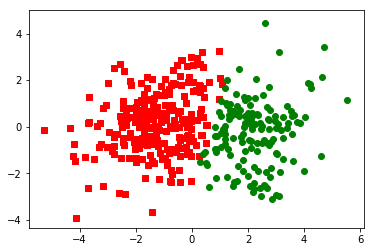

In [243]:
'''原始的两类有标签数据，将这两类数据用k-means聚类，看看最后效果'''
data = pd.read_csv('../data/testdata')
cluster_0 = data[data['class'] == 0].ix[:,:-1]
cluster_1 = data[data['class'] == 1].ix[:,:-1]
display(data.head())


plot = plt.figure()
ax = plot.add_subplot(111)
ax.scatter(cluster_0.ix[:,0],cluster_0.ix[:,1],c='red',marker='s')
ax.scatter(cluster_1.ix[:,0],cluster_1.ix[:,1],c='green')

In [244]:
#用来进行聚类的数据
data = data.ix[:,:-1].as_matrix()
data.shape

(398, 2)

In [245]:
#初始化簇中心，随机选择指定个簇中心
def initCenter(data, cluster_num):
    #样本个数
    sample_num = data.shape[0]
    number = range(sample_num)    
    index = [random.choice(number) for _ in range(cluster_num)]
    return data[index,:]

#centers = initCenter(data,5)

In [246]:
#计算所有样本与与簇中心的距离，返回内容是：一行代表所有样本与其中一个簇中心的距离
def calcDistance(data, centers):    
    diffs = []
    #所有样本与簇中心的差    
    diff_func = lambda c: diffs.append(data - c)
    #将所有样本与所有簇中心的差保存在diffs中
    map(diff_func, centers) 
    #保存所有样本与所有簇中心的距离
    allsample_distances = []
    for diff in diffs:        
    #将所有样本与单个簇中心的距离平方保存在distances中
        distances = []       
        map(lambda d: distances.append(np.dot(d, d.T)), diff) 
        allsample_distances.append(distances)
    allsample_distances = np.array(allsample_distances)
    return allsample_distances

#获得所有样本离哪个簇中心最近
def getSampleFlag(data,centers):
    flag = []
    distance = calcDistance(data, centers)
    df_distance = DataFrame(distance)
    min_distance = df_distance.min()
    #选出每一列最小值的索引，（后期希望能找到优化方法）
    for i,d in enumerate(df_distance):
        flag.extend(list(df_distance[i][df_distance[i] == min_distance[i]].index))
    return np.array(flag)
#calcDistance(data, centers)    
#getSampleFlag(data,centers)

In [247]:
#初始化指定簇字典
def initCluster(cluster_num):
    return {}.fromkeys(range(cluster_num),-1)
#initCluster(5)

#将样本索引归入相应的簇字典中
def mergeClusterSample(flag,cluster_num):
    dict_cluster = initCluster(cluster_num)
    flag = Series(flag)
    for i in flag.unique():
        dict_cluster[i] = list(flag[flag == i].index)
    return dict_cluster

# flag = getSampleFlag(data,centers)        
# dict_cluster = initCluster(5)
# dict_cluster = mergeClusterSample(flag,dict_cluster)        

In [248]:
#计算新簇中每一个簇的中心
def calcClusterCenter(data, cluster):
    centers = []
    for key, value in cluster.items():
        centers.append(data[value,:].mean(axis=0))
    return centers

#calcClusterCenter(data, dict_cluster)

In [258]:
#整个k-means的整合,返回一个字典{簇标记：样本在data中的索引号} 和 簇中心
def kmeans(repeat_num, data, cluster_num):   
    #记录循环了几次之后收敛
    t = 0
    #初始化簇中心
    centers = initCenter(data, cluster_num)
    for i in range(repeat_num):   
        #获得所有样本离哪个簇中心最近
        flag = getSampleFlag(data,centers)
        #将样本在数据集中的索引归入相应的簇字典中
        dict_cluster = mergeClusterSample(flag,cluster_num) 
        #计算新簇中每一个簇的中心
        new_centers = calcClusterCenter(data, dict_cluster)
        t += 1
        #如果簇中心变化很小，则认为收敛了，退出算法
        if  (np.array(new_centers).round(3) == np.array(centers).round(3)).all():
            print t
            break        
        centers = new_centers
        
    return dict_cluster,centers

dict_cluster,centers = kmeans(100, data, 2)

8


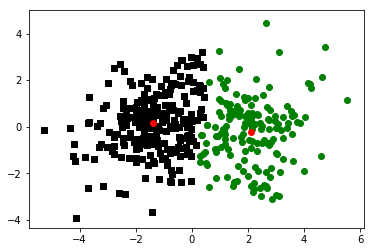

In [259]:
#对聚类结果进行了测试，效果还可以
test_centers = []
centers = np.array(centers)
for k,v in dict_cluster.items():
    test_centers.append(data[v,:])
    
plot = plt.figure()
ax = plot.add_subplot(111)
ax.scatter(test_centers[0][:,0],test_centers[0][:,1],c='black',marker='s')
ax.scatter(test_centers[1][:,0],test_centers[1][:,1],c='green')
ax.scatter(centers[:,0],centers[:,1],c='red')